In [2]:
# import sys, os
# # sys.path.append(os.path.dirname(__file__))

# import argparse
# from function import adaptive_instance_normalization
# import net
# from pathlib import Path
# from PIL import Image
# import random
# import torch
# import torch.nn as nn
# import torchvsion.transforms
# from torchvision.utils import save_image
# from tqdm import tqdm

# class StyleTransfer(object):
#     def __init__(self, style_dir, alpha=1., content_size=512, style_size=256):
#         #self.content = content
#         self.alpha = alpha
#         # collect style files
#         style_dir = Path(style_dir)
#         style_dir = style_dir.resolve()
#         extensions = ['png', 'jpeg', 'jpg']
#         styles = []
#         for ext in extensions:
#             styles += list(style_dir.rglob('*.' + ext))

#         assert len(styles) > 0, 'No images with specified extensions found in style directory' + style_dir
#         self.styles = sorted(styles)
#         # print('Found %d style images in %s' % (len(styles), style_dir))

#         decoder = net.decoder
#         vgg = net.vgg
#         decoder.eval()
#         vgg.eval()
#         decoder.load_state_dict(torch.load('/home/users/stellasu/Transformer-SSL/data/style_transfer/models/decoder.pth'))
#         vgg.load_state_dict(torch.load('/home/users/stellasu/Transformer-SSL/data/style_transfer/models/vgg_normalised.pth'))
#         self.vgg = nn.Sequential(*list(vgg.children())[:31])
#         self.decoder = decoder

#         crop = 0
#         self.content_tf = self.input_transform(content_size, crop)
#         self.style_tf = self.input_transform(style_size, 0)

#     def input_transform(self, size, crop):
#         transform_list = []
#         if size != 0:
#             transform_list.append(torchvision.transforms.Resize(size))
#         if crop != 0:
#             transform_list.append(torchvision.transforms.CenterCrop(crop))
#         transform_list.append(torchvision.transforms.ToTensor())
#         transform = torchvision.transforms.Compose(transform_list)
#         return transform

#     def style_transfer(self, vgg, decoder, content, style, alpha=1.0):
#         assert (0.0 <= alpha <= 1.0)
#         content_f = vgg(content)
#         style_f = vgg(style)
#         feat = adaptive_instance_normalization(content_f, style_f)
#         feat = feat * alpha + content_f * (1 - alpha)
#         return decoder(feat)

#     def _call__(self, content):
#         # disable decompression bomb errors
#         Image.MAX_IMAGE_PIXELS = None

#         # actual style transfer as in AdaIN
        
#         for style_path in random.sample(self.styles, 1):
#             style_img = Image.open(style_path).convert('RGB')
            
#             content = self.content_tf(content)
#             style = self.style_tf(style_img)
#             style = style.unsqueeze(0)
#             content = content.unsqueeze(0)
#             #style = style.to(device).unsqueeze(0)
#             #content = content.to(device).unsqueeze(0)
#             with torch.no_grad():
#                 output = self.style_transfer(self.vgg, self.decoder, content, style, self.alpha)
#             #output = output.cpu()
#             # output = output.cpu().numpy()

#             style_img.close()
#         content_img.close()
#         return output, style_path

In [3]:
# from style_transfer import stylize
# import numpy as np
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(2)
# ax[0].imshow(np.array(Image.open(sys.argv[1])))
# stylize = StyleTransfer(styledir='/scratch/users/stellasu/pytorch-AdaIN/input/styleexample', content_size=512)
# content_name = '/scratch/users/stellasu/prostate_panda/train_images_tiles_level_0_512/0/bfed5501cd4160d9cf038f99f992dd20/bfed5501cd4160d9cf038f99f992dd20_512_x17920_35_48_y3072_6_55.png'
# content_img = Image.open(content_name).convert('RGB')
# output, _ = stylize(content_img)
# ax[1].imshow(output.squeeze().cpu().numpy().transpose(1,2,0))
# plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


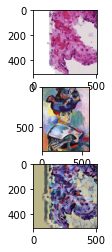

In [5]:
import torchvision
from style_transfer import stylize
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import sys

if __name__ == '__main__':
    fig, ax = plt.subplots(3)
    content_name = '/scratch/users/stellasu/prostate_panda/train_images_tiles_level_0_512/0/bfed5501cd4160d9cf038f99f992dd20/bfed5501cd4160d9cf038f99f992dd20_512_x17920_35_48_y3072_6_55.png'
    ax[0].imshow(np.array(Image.open(content_name)))
    stylize2 = stylize.StyleTransfer(style_dir='/scratch/users/stellasu/pytorch-AdaIN/input/styleexample', content_size=512)
    #content_name = '/scratch/users/stellasu/prostate_panda/train_images_tiles_level_0_512/0/bfed5501cd4160d9cf038f99f992dd20/bfed5501cd4160d9cf038f99f992dd20_512_x17920_35_48_y3072_6_55.png'
    content_img = Image.open(content_name).convert('RGB')
    output = stylize2(content_img)
#     print(type(output))
#     style_img = Image.open(output[1]).convert('RGB')
    ax[1].imshow(np.array(Image.open(output[1])))
    ax[2].imshow(output[0].squeeze().cpu().numpy().transpose(1,2,0))
    plt.show()
